## Homework 12.1 - Support Vector Machines for Different Data Sets

The following code cell generates four different data sets.

In [1]:
from sklearn import datasets
n_samples = 50

X1, y1 = datasets.make_circles(n_samples=n_samples, factor=.5,
                               noise=.05, random_state=0)

X2, y2 = datasets.make_moons(n_samples=n_samples, noise=.05,
                             random_state=0)

X3, y3 = datasets.make_blobs(n_samples=n_samples, random_state=0, centers=2)

X4, y4 = datasets.make_blobs(n_samples=n_samples, random_state=0, centers=2,
                             cluster_std=[0.8, 1.7])

From the lab, you should be familiar with the `plotDecisionFunction()` function:

In [7]:
import numpy as np

def plotDecisionFunction(model, ax=None):
    """Plot the decision function of a SVC model in 2 dimensions"""
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X,Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=30, linewidth=1, facecolors='none', edgecolor='red');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

**Task**: Implement one support vector machine for each of the model data $(X_i,y_i)$, $i=1,2,3,4$.
Choose suitable kernel functions and penalty parameters $C$.
You can use the following code cell to experiment with different settings.
Afterwards, you should fix `model1` to `model4` and execute the last code cell to see, how the classifiers perform for the other data sets.

In [3]:
from sklearn.svm import SVC

from ipywidgets import interactive
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,9)

X = X1
y = y1
def mySVC(myC):
    model = SVC(kernel='poly', gamma='auto', degree=3, C=myC)
    #model = SVC(kernel='poly', gamma='auto', degree=6, C=myC)
    #model = SVC(kernel='sigmoid', gamma='auto', C=myC)
    #model = SVC(kernel='rbf', gamma='auto', degree=3, C=myC)
    model.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap='viridis')
    plotDecisionFunction(model);

interactive_plot = interactive(mySVC, myC=(0.005,15,0.02))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=7.485, description='myC', max=15.0, min=0.005, step=0.02), Output(layo…

In [4]:
model1 =
model2 = 
model3 =
model4 = 

SyntaxError: invalid syntax (<ipython-input-4-b4a61c7a13da>, line 1)

**Solution**:

In [8]:
model1 = SVC(kernel='poly', gamma='auto', degree=2, C=15)
model2 = SVC(kernel='rbf', gamma='auto', C=12)
model3 = SVC(kernel='linear', gamma='auto', C=5)
model4 = SVC(kernel='poly', gamma='auto', degree=3, C=7)

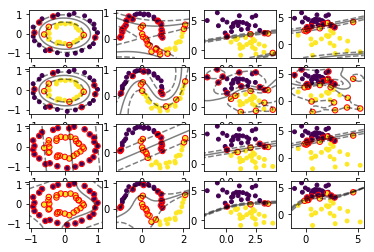

In [9]:
fig, ax =plt.subplots(4,4)
for (i,(X,y)) in enumerate([(X1,y1), (X2,y2), (X3,y3), (X4,y4)]):
    for (j,model) in enumerate([model1, model2, model3, model4]):
        model.fit(X,y)
        plt.sca(ax[j][i])
        plt.scatter(X[:, 0], X[:, 1], c=y, s=15, cmap='viridis')
        plotDecisionFunction(model)